In [7]:
import numpy as np
import pandas as pd
import networkx as nx
import re
import json

In [8]:
fp = './data/tweets.csv'
# fp = './data/tweets.xlsx'
# fp = './data/les_miserables.json'
# fp = './data/lesmiserables.gml'
# fp = './data/cpan-authors.gexf'

In [9]:
from modules.document_processing import DocumentGraphProcessing

In [10]:
p = DocumentGraphProcessing(fp)

Enter sink and source for data processing


In [11]:
p = DocumentGraphProcessing(fp,'handle', 'original_author', min_deg = 1, max_deg = 10)

In [12]:
p.FILEPATH

'./data/tweets.csv'

In [13]:
# p.detect_filetype()

In [14]:
p.file_ext

'csv'

In [15]:
p.df

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6439,684219579548041218,realDonaldTrump,"""@lilredfrmkokomo: @realDonaldTrump My Faceboo...",False,NaN,2016-01-05T03:47:14,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/android,False,"{'user_mentions': [{'id_str': '26122621', 'nam...",NaN
6440,684218836569206784,realDonaldTrump,"""@marybnall01: @realDonaldTrump watched lowell...",False,NaN,2016-01-05T03:44:17,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/android,False,"{'user_mentions': [{'id_str': '3477455725', 'n...",NaN
6441,684218305100525569,realDonaldTrump,"""@ghosthunter_lol: Iowa key endorsement for @r...",False,NaN,2016-01-05T03:42:10,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/android,False,{'media': [{'display_url': 'pic.twitter.com/JB...,{'media': [{'display_url': 'pic.twitter.com/JB...
6442,684217554861199360,realDonaldTrump,"""@iLoveiDevices: @EdwinRo47796972 @happyjack22...",False,NaN,2016-01-05T03:39:11,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/android,False,"{'user_mentions': [{'id_str': '42568997', 'nam...",NaN


In [16]:
p.draw()

In [17]:
p.n_nodes

278

In [18]:
p.centrality.sort_values('betweenness', ascending = False)

,degree,closeness,betweenness,eigenvector,degree_nonnormal
HillaryClinton,0.815884,0.725131,0.961165,0.718771,227
realDonaldTrump,0.202166,0.383657,0.340776,0.008455,56
Morning_Joe,0.007220,0.501812,0.154594,0.046990,2
GMA,0.007220,0.501812,0.154594,0.046990,2
JaniceTaylor912,0.003610,0.277555,0.000000,0.000546,1
...,...,...,...,...,...
newtgingrich,0.003610,0.277555,0.000000,0.000546,1
CBSEveningNews,0.003610,0.420973,0.000000,0.046444,1
HFA,0.003610,0.420973,0.000000,0.046444,1
RepBecerra,0.003610,0.420973,0.000000,0.046444,1


In [19]:
p.NODELIST

,node_name,id,text,is_retweet,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,lang,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
1,HillaryClinton,780916180899037184,"Last night, Donald Trump said not paying taxes...",True,2016-09-27T23:45:00,NaN,NaN,NaN,False,en,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
11,realDonaldTrump,780867418012979204,"On National #VoterRegistrationDay, make sure y...",True,2016-09-27T20:31:14,NaN,NaN,NaN,False,en,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,False,"{'user_mentions': [{'id_str': '11134252', 'nam...",NaN
1,timkaine,780916180899037184,"Last night, Donald Trump said not paying taxes...",True,2016-09-27T23:45:00,NaN,NaN,NaN,False,en,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
2,POTUS,780911564857761793,Couldn't be more proud of @HillaryClinton. Her...,True,2016-09-27T23:26:40,NaN,NaN,NaN,False,en,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN
9,mcuban,780874710049550336,3) Has Trump offered a single proposal to redu...,True,2016-09-27T21:00:13,NaN,NaN,NaN,False,en,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,"{'user_mentions': [{'id_str': '16228398', 'nam...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6003,ErinBurnett,694257857546559488,Sat down w/ @EricTrump @DonaldJTrumpJr here in...,True,2016-02-01T20:35:46,NaN,NaN,NaN,False,en,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,"{'user_mentions': [{'id_str': '322603418', 'na...",NaN
6143,GeraldoRivera,691686187795378176,#NewYork tromps #Jonas. Day after storm of the...,True,2016-01-25T18:16:52,NaN,NaN,NaN,False,en,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,"{'user_mentions': [{'id_str': '246500501', 'na...",NaN
6223,williebosshog,690404308010057728,Make America Great Again! #Trump2016 https://t...,True,2016-01-22T05:23:08,NaN,NaN,NaN,False,en,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,False,{'media': [{'display_url': 'pic.twitter.com/1h...,{'media': [{'display_url': 'pic.twitter.com/1h...
6249,SarahPalinUSA,689870751374016512,Trading in the beautiful snow of Iowa for the ...,True,2016-01-20T18:02:58,NaN,NaN,NaN,False,en,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,False,"{'user_mentions': [{'id_str': '65493023', 'nam...",NaN


In [20]:
p.EDGELIST

,handle,original_author
0,HillaryClinton,timkaine
1,HillaryClinton,POTUS
2,HillaryClinton,mcuban
3,HillaryClinton,ddlovato
4,realDonaldTrump,GOP
...,...,...
717,realDonaldTrump,SarahPalinUSA
718,realDonaldTrump,EricTrump
719,realDonaldTrump,JaniceTaylor912
720,realDonaldTrump,DRUDGE_REPORT


In [21]:
p.centrality

,degree,closeness,betweenness,eigenvector,degree_nonnormal
JaniceTaylor912,0.00361,0.277555,0.0,0.000546,1
SenatorBaldwin,0.00361,0.420973,0.0,0.046444,1
TUSK81,0.00361,0.420973,0.0,0.046444,1
HillaryforWI,0.00361,0.420973,0.0,0.046444,1
barb_kinney,0.00361,0.420973,0.0,0.046444,1
...,...,...,...,...,...
jastengco,0.00361,0.420973,0.0,0.046444,1
MarkHalperin,0.00361,0.277555,0.0,0.000546,1
StopBigMoney,0.00361,0.420973,0.0,0.046444,1
MariaTCardona,0.00361,0.420973,0.0,0.046444,1


In [22]:
p.filter_graph_degree()

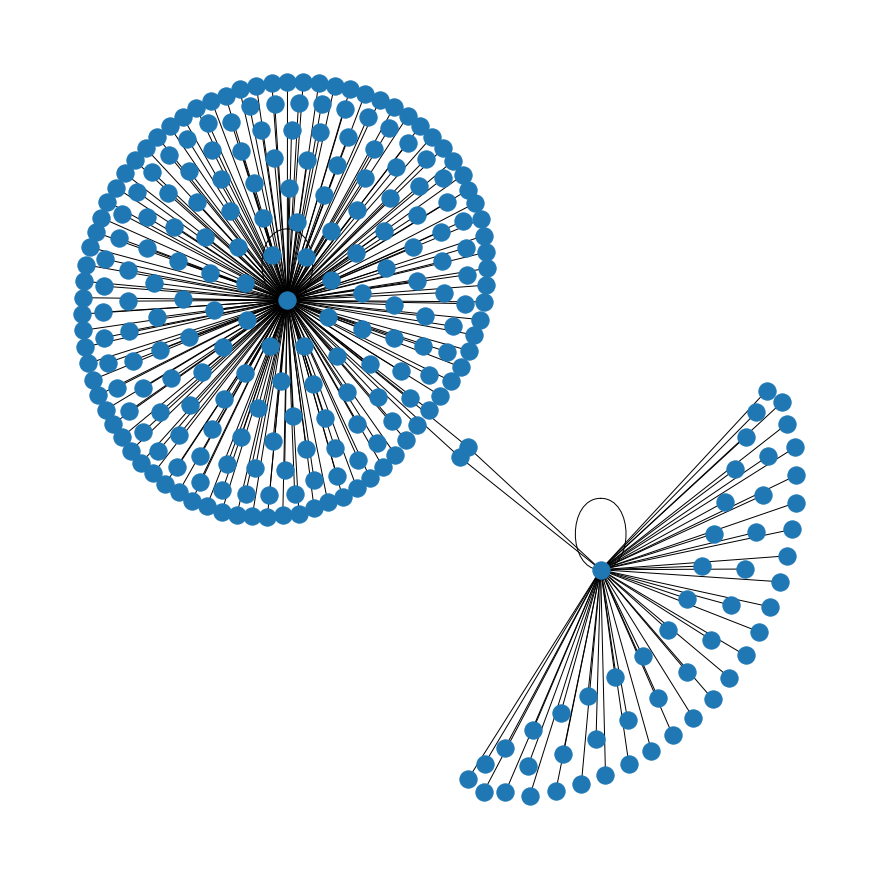

In [23]:
p.draw(scope='full')

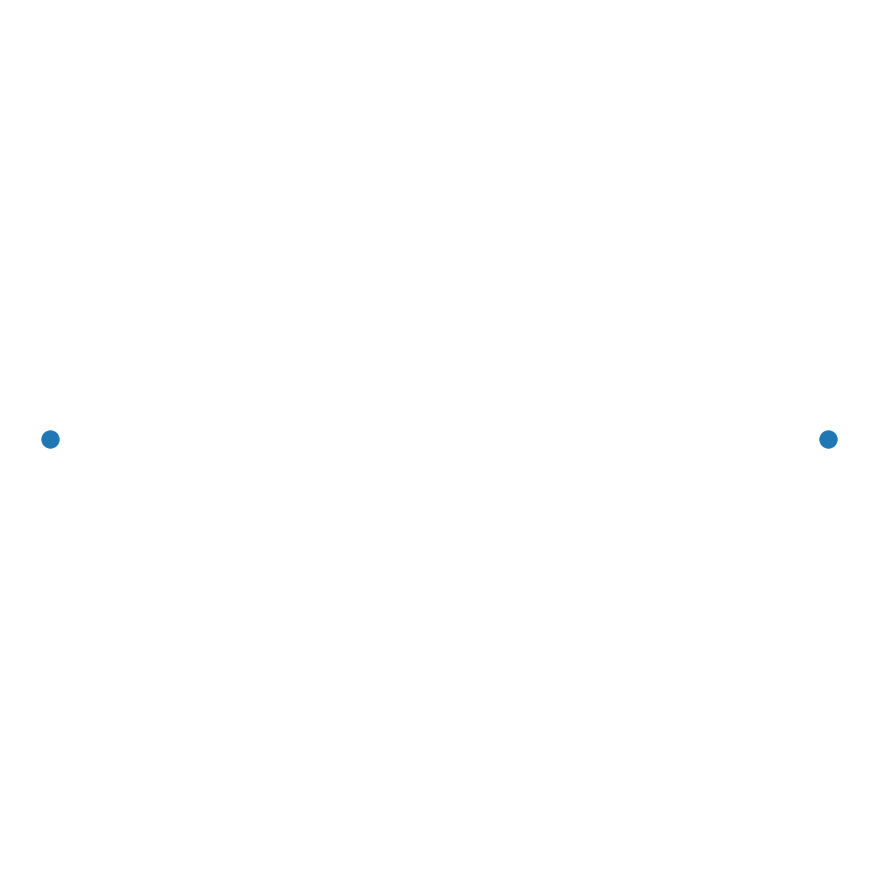

In [24]:
p.draw(scope='subgraph')

## File out

In [26]:
# p.write_csv()

## Edge and Node Lists

In [27]:
pd.DataFrame(p.all_edges, columns = [p.source_col, p.sink_col])

,handle,original_author
0,HillaryClinton,timkaine
1,HillaryClinton,POTUS
2,HillaryClinton,mcuban
3,HillaryClinton,ddlovato
4,realDonaldTrump,GOP
...,...,...
717,realDonaldTrump,SarahPalinUSA
718,realDonaldTrump,EricTrump
719,realDonaldTrump,JaniceTaylor912
720,realDonaldTrump,DRUDGE_REPORT


In [28]:
p.EDGELIST

,handle,original_author
0,HillaryClinton,timkaine
1,HillaryClinton,POTUS
2,HillaryClinton,mcuban
3,HillaryClinton,ddlovato
4,realDonaldTrump,GOP
...,...,...
717,realDonaldTrump,SarahPalinUSA
718,realDonaldTrump,EricTrump
719,realDonaldTrump,JaniceTaylor912
720,realDonaldTrump,DRUDGE_REPORT


In [29]:
source_node_cols = [p.source_col] + [col for col in p.df.columns if (col != p.source_col) and (col != p.sink_col)]
source_node_cols

['handle',
 'id',
 'text',
 'is_retweet',
 'time',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'is_quote_status',
 'lang',
 'retweet_count',
 'favorite_count',
 'longitude',
 'latitude',
 'place_id',
 'place_full_name',
 'place_name',
 'place_type',
 'place_country_code',
 'place_country',
 'place_contained_within',
 'place_attributes',
 'place_bounding_box',
 'source_url',
 'truncated',
 'entities',
 'extended_entities']

In [30]:
sink_node_cols = [p.sink_col] + [col for col in p.df.columns if (col != p.source_col) and (col != p.sink_col)]
sink_node_cols

['original_author',
 'id',
 'text',
 'is_retweet',
 'time',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'is_quote_status',
 'lang',
 'retweet_count',
 'favorite_count',
 'longitude',
 'latitude',
 'place_id',
 'place_full_name',
 'place_name',
 'place_type',
 'place_country_code',
 'place_country',
 'place_contained_within',
 'place_attributes',
 'place_bounding_box',
 'source_url',
 'truncated',
 'entities',
 'extended_entities']

In [31]:
nodelist_df = pd.concat([
    df_sub[source_node_cols].rename(columns = {'handle': 'node_name'}),
    df_sub[sink_node_cols].rename(columns = {'original_author': 'node_name'})
])

NameError: name 'df_sub' is not defined

In [32]:
nodelist_df.drop_duplicates(subset = ['node_name'])

NameError: name 'nodelist_df' is not defined

## Centrality Measurements

In [33]:
deg = nx.degree_centrality(p.g)

In [34]:
closeness = nx.closeness_centrality(p.g)

In [35]:
betweenness = nx.betweenness_centrality(p.g)

In [36]:
eigen = nx.eigenvector_centrality(p.g)

In [37]:
cen = pd.DataFrame([deg, closeness, betweenness, eigen]).transpose()
cen.columns = ['degree', 'closeness', 'betweenness', 'eigenvector']
cen['degree_nonnormal'] = cen.degree.apply(lambda x: int(round(x * p.n_nodes)))

In [38]:
cen

,degree,closeness,betweenness,eigenvector,degree_nonnormal
JaniceTaylor912,0.00361,0.277555,0.0,0.000546,1
SenatorBaldwin,0.00361,0.420973,0.0,0.046444,1
TUSK81,0.00361,0.420973,0.0,0.046444,1
HillaryforWI,0.00361,0.420973,0.0,0.046444,1
barb_kinney,0.00361,0.420973,0.0,0.046444,1
...,...,...,...,...,...
jastengco,0.00361,0.420973,0.0,0.046444,1
MarkHalperin,0.00361,0.277555,0.0,0.000546,1
StopBigMoney,0.00361,0.420973,0.0,0.046444,1
MariaTCardona,0.00361,0.420973,0.0,0.046444,1


In [39]:
p.centrality.sort_values('degree_nonnormal', ascending = False)

,degree,closeness,betweenness,eigenvector,degree_nonnormal
HillaryClinton,0.815884,0.725131,0.961165,0.718771,227
realDonaldTrump,0.202166,0.383657,0.340776,0.008455,56
Morning_Joe,0.007220,0.501812,0.154594,0.046990,2
GMA,0.007220,0.501812,0.154594,0.046990,2
JaniceTaylor912,0.003610,0.277555,0.000000,0.000546,1
...,...,...,...,...,...
newtgingrich,0.003610,0.277555,0.000000,0.000546,1
CBSEveningNews,0.003610,0.420973,0.000000,0.046444,1
HFA,0.003610,0.420973,0.000000,0.046444,1
RepBecerra,0.003610,0.420973,0.000000,0.046444,1


In [40]:
df = cen.loc[(cen.degree_nonnormal > 1) & (cen.degree_nonnormal < 227)].reset_index(drop=False)
df

,index,degree,closeness,betweenness,eigenvector,degree_nonnormal
0,GMA,0.007220,0.501812,0.154594,0.046990,2
1,Morning_Joe,0.007220,0.501812,0.154594,0.046990,2
2,realDonaldTrump,0.202166,0.383657,0.340776,0.008455,56


In [41]:
df.columns = ['node_name'] + list(df.columns)[1:]

In [42]:
df.node_name

0                GMA
1        Morning_Joe
2    realDonaldTrump
Name: node_name, dtype: object

In [43]:
g = nx.induced_subgraph(p.g, df.node_name)

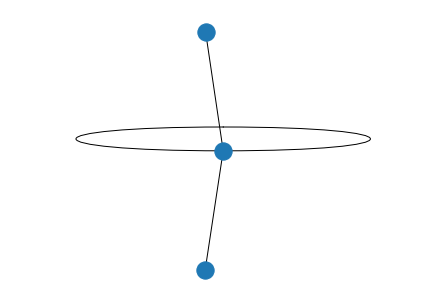

In [44]:
nx.draw_kamada_kawai(g)

In [45]:
pd.to_excel('test.xlsx')

AttributeError: module 'pandas' has no attribute 'to_excel'

In [46]:
pd.ExcelWriter("output.xlsx")

In [47]:
p.EDGELIST.to_excel('testing.xlsx')

In [58]:
t = p.NODELIST.to_json()
t

ValueError: DataFrame index must be unique for orient='columns'.

In [55]:
pd.DataFrame(dict=t)

TypeError: __init__() got an unexpected keyword argument 'dict'

'{"handle":{"0":"HillaryClinton","1":"HillaryClinton","2":"HillaryClinton","3":"HillaryClinton","4":"realDonaldTrump","5":"HillaryClinton","6":"HillaryClinton","7":"HillaryClinton","8":"HillaryClinton","9":"HillaryClinton","10":"HillaryClinton","11":"HillaryClinton","12":"HillaryClinton","13":"HillaryClinton","14":"HillaryClinton","15":"HillaryClinton","16":"HillaryClinton","17":"HillaryClinton","18":"realDonaldTrump","19":"HillaryClinton","20":"realDonaldTrump","21":"realDonaldTrump","22":"HillaryClinton","23":"HillaryClinton","24":"realDonaldTrump","25":"HillaryClinton","26":"HillaryClinton","27":"realDonaldTrump","28":"realDonaldTrump","29":"HillaryClinton","30":"HillaryClinton","31":"HillaryClinton","32":"realDonaldTrump","33":"HillaryClinton","34":"realDonaldTrump","35":"HillaryClinton","36":"HillaryClinton","37":"realDonaldTrump","38":"HillaryClinton","39":"HillaryClinton","40":"HillaryClinton","41":"HillaryClinton","42":"HillaryClinton","43":"HillaryClinton","44":"HillaryClinton